In [1]:
import cv2
import numpy as np
import os
from PIL import Image
from matplotlib import pyplot as plt

In [17]:
image = cv2.imread('C:/Users/niran/Desktop/Project/Test.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [18]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
equalized = cv2.equalizeHist(gray)
clahe_img = clahe.apply(equalized)
only_clahe = clahe.apply(gray)

Data preprocessing

In [2]:
def apply_preprocessing(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    equalized = cv2.equalizeHist(gray)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    preprocessed_img = clahe.apply(equalized)
    return preprocessed_img

In [3]:
image = cv2.imread('C:/Users/niran/Desktop/Project/Test.jpg')
output = apply_preprocessing(image)
cv2.imshow('Original image', image)
cv2.imshow('Preprocessed image', output)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.5.4-dev) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1274: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


# All images

Bug: input = 509 images, output = 503 images. i.e. 6 image names not unique.

In [12]:
list_of_directories = ["./data/"]

In [13]:
total_images = 0
print("Number of Images in Each Directory:")
for directory in list_of_directories:
    curr_images = len(os.listdir(directory))
    print(f"{directory}: {curr_images}")
    total_images += curr_images
print("Total number of images: " + str(total_images))

Number of Images in Each Directory:
./data/: 3
Total number of images: 3


In [14]:
def preprocess_images(ORIGIN_PATH):
    DESTIN_PATH = "./Preprocessed/"
    for filename in os.listdir(ORIGIN_PATH):
        print(ORIGIN_PATH + filename)
        try:
            image = cv2.imread(ORIGIN_PATH + filename)
            image = apply_preprocessing(image)
            cv2.imwrite(DESTIN_PATH + filename, image)
        except: 
            print("Failed: " + DESTIN_PATH + filename)
            continue

In [15]:
for directory in list_of_directories:
    preprocess_images(directory)

./data/Test1.jpg
./data/Test2.png
./data/Test3.png


Histogram

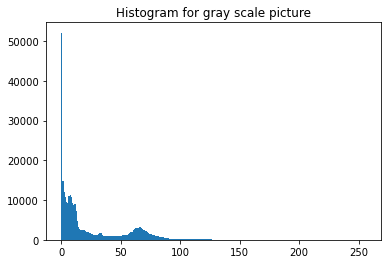

In [8]:
gray_img = cv2.imread('C:/Users/niran/Desktop/Project/Test.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imshow('Grey', gray_img)
hist = cv2.calcHist([gray_img],[0],None,[256],[0,256])
plt.hist(gray_img.ravel(),256,[0,256])
plt.title('Histogram for gray scale picture')
plt.show()

while True:
    k = cv2.waitKey(0) & 0xFF     
    if k == 27: break             # ESC key to exit 
cv2.destroyAllWindows()

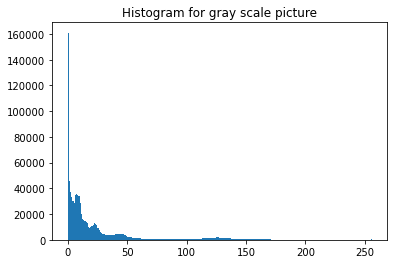

In [10]:
# Original
image = cv2.imread('C:/Users/niran/Desktop/Project/Test.jpg')
hist = cv2.calcHist([image],[0],None,[256],[0,256])
plt.hist(image.ravel(),256,[0,256])
plt.title('Histogram for original image')
plt.show()

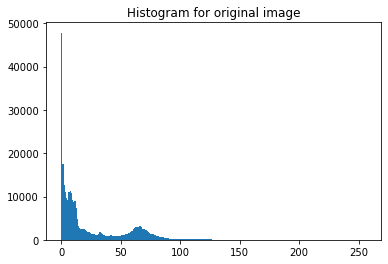

In [11]:
# Grey
grey_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist([grey_img],[0],None,[256],[0,256])
plt.hist(grey_img.ravel(),256,[0,256])
plt.title('Histogram for grey image')
plt.show()

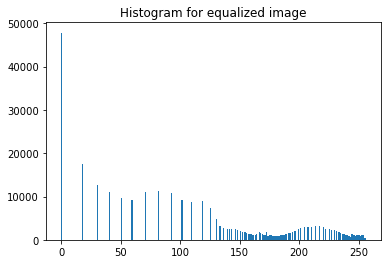

In [13]:
# CHE?
equalized = cv2.equalizeHist(grey_img)
hist = cv2.calcHist([equalized],[0],None,[256],[0,256])
plt.hist(equalized.ravel(),256,[0,256])
plt.title('Histogram for equalized image')
plt.show()

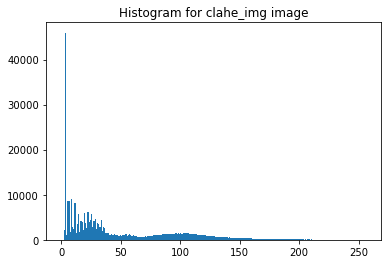

In [15]:
# CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(grey_img)
hist = cv2.calcHist([clahe_img],[0],None,[256],[0,256])
plt.hist(clahe_img.ravel(),256,[0,256])
plt.title('Histogram for clahe_img image')
plt.show()

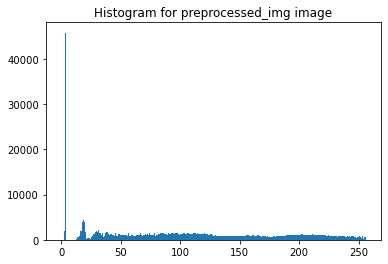

In [16]:
# ECHE + CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
preprocessed_img = clahe.apply(equalized)
hist = cv2.calcHist([preprocessed_img],[0],None,[256],[0,256])
plt.hist(preprocessed_img.ravel(),256,[0,256])
plt.title('Histogram for preprocessed_img image')
plt.show()

In [8]:
def apply_clahe(img):
    clahe = cv2.createCLAHE(clipLimit=600.0, tileGridSize=(1, 1))
    img_clahe = clahe.apply(img)
    cv2.normalize(img_clahe, img_clahe, 0, 255, cv2.NORM_MINMAX)
    img_en = cv2.convertScaleAbs(img_clahe)
    return img_en

In [ ]:
cv2.imshow('Original image', image)
cv2.imshow('Gray image', gray)
cv2.imshow('Equalized image', equalized)
cv2.imshow('CLAHE image', clahe_img)
cv2.imshow('ONLY CLAHE image', only_clahe)
cv2.waitKey(0)
cv2.destroyAllWindows()